# Regresja liniowa: nadmierne dopasowanie i regularyzacja

W tym zadaniu zobaczymy, jak modele liniowe przetrenowują się, zrozumiemy, dlaczego tak się dzieje i dowiemy się, jak diagnozować i kontrolować przetrenowanie.

We wszystkich komórkach, w których znajduje się komentarz z instrukcjami, należy napisać kod wykonujący te instrukcje. Pozostałe komórki z kodem (bez komentarzy) należy po prostu wykonać. Ponadto zadanie wymaga udzielenia odpowiedzi na pytania; odpowiedzi należy wpisać po wyróżnionym słowie "__Answer:__".

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Będziemy pracować ze zbiorem danych "bikes_rent.csv", który zawiera informacje kalendarzowe i warunki pogodowe, które charakteryzują zautomatyzowane punkty wypożyczania rowerów, a także liczbę wypożyczeń w danym dniu. Te ostatnie będziemy przewidywać; w ten sposób rozwiążemy problem regresji.

## Zapoznanie się z danymi

## Zadanie 1

Załaduj zestaw danych za pomocą funkcji __pandas.read_csv__ do zmiennej __df__. Wydrukuj pierwsze 5 wierszy, aby upewnić się, że dane zostały poprawnie odczytane:

In [15]:
df = pd.read_csv("bikes_rent.csv")
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


Dla każdego dnia roboczego znane są następujące atrybuty:
* _season_: 1 - wiosna, 2 - lato, 3 - jesień, 4 - zima.
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: od 1 do 12.
* _holiday_: 0 - brak wakacji, 1 - wakacje.
* _weekday_: 0 do 6
* _workingday_: 0 oznacza dzień wolny od pracy, 1 oznacza dzień roboczy.
* _weathersit_: ocena korzystnej pogody od 1 (czysty, pogodny dzień) do 4 (ulewny deszcz, mgła)
* _temp_: temperatura w stopniach Celsjusza.
* _atemp_: temperatura w stopniach Celsjusza.
* _hum_: wilgotność
* _windspeed(mph)_: prędkość wiatru w milach na godzinę.
* _windspeed(ms)_: prędkość wiatru w metrach na sekundę.
* _cnt_: liczba wypożyczonych rowerów (jest to atrybut docelowy, będziemy go przewidywać).

Mamy więc cechy rzeczywiste, binarne i nominalne (porządkowe), a wszystkie z nich można traktować jako cechy rzeczywiste. Atrybuty nominalne mogą być również traktowane jako rzeczywiste, ponieważ mają porządek. Zobaczmy na wykresach, jak cecha docelowa zależy od innych cech

Wykres zależności atrybutów od liczby przejazdów. Innymi słowy, należy zbudować 12 wykresów. Każdy z nich powinien pokazywać zależność kolejnego atrybutu od zmiennej **cnt**.

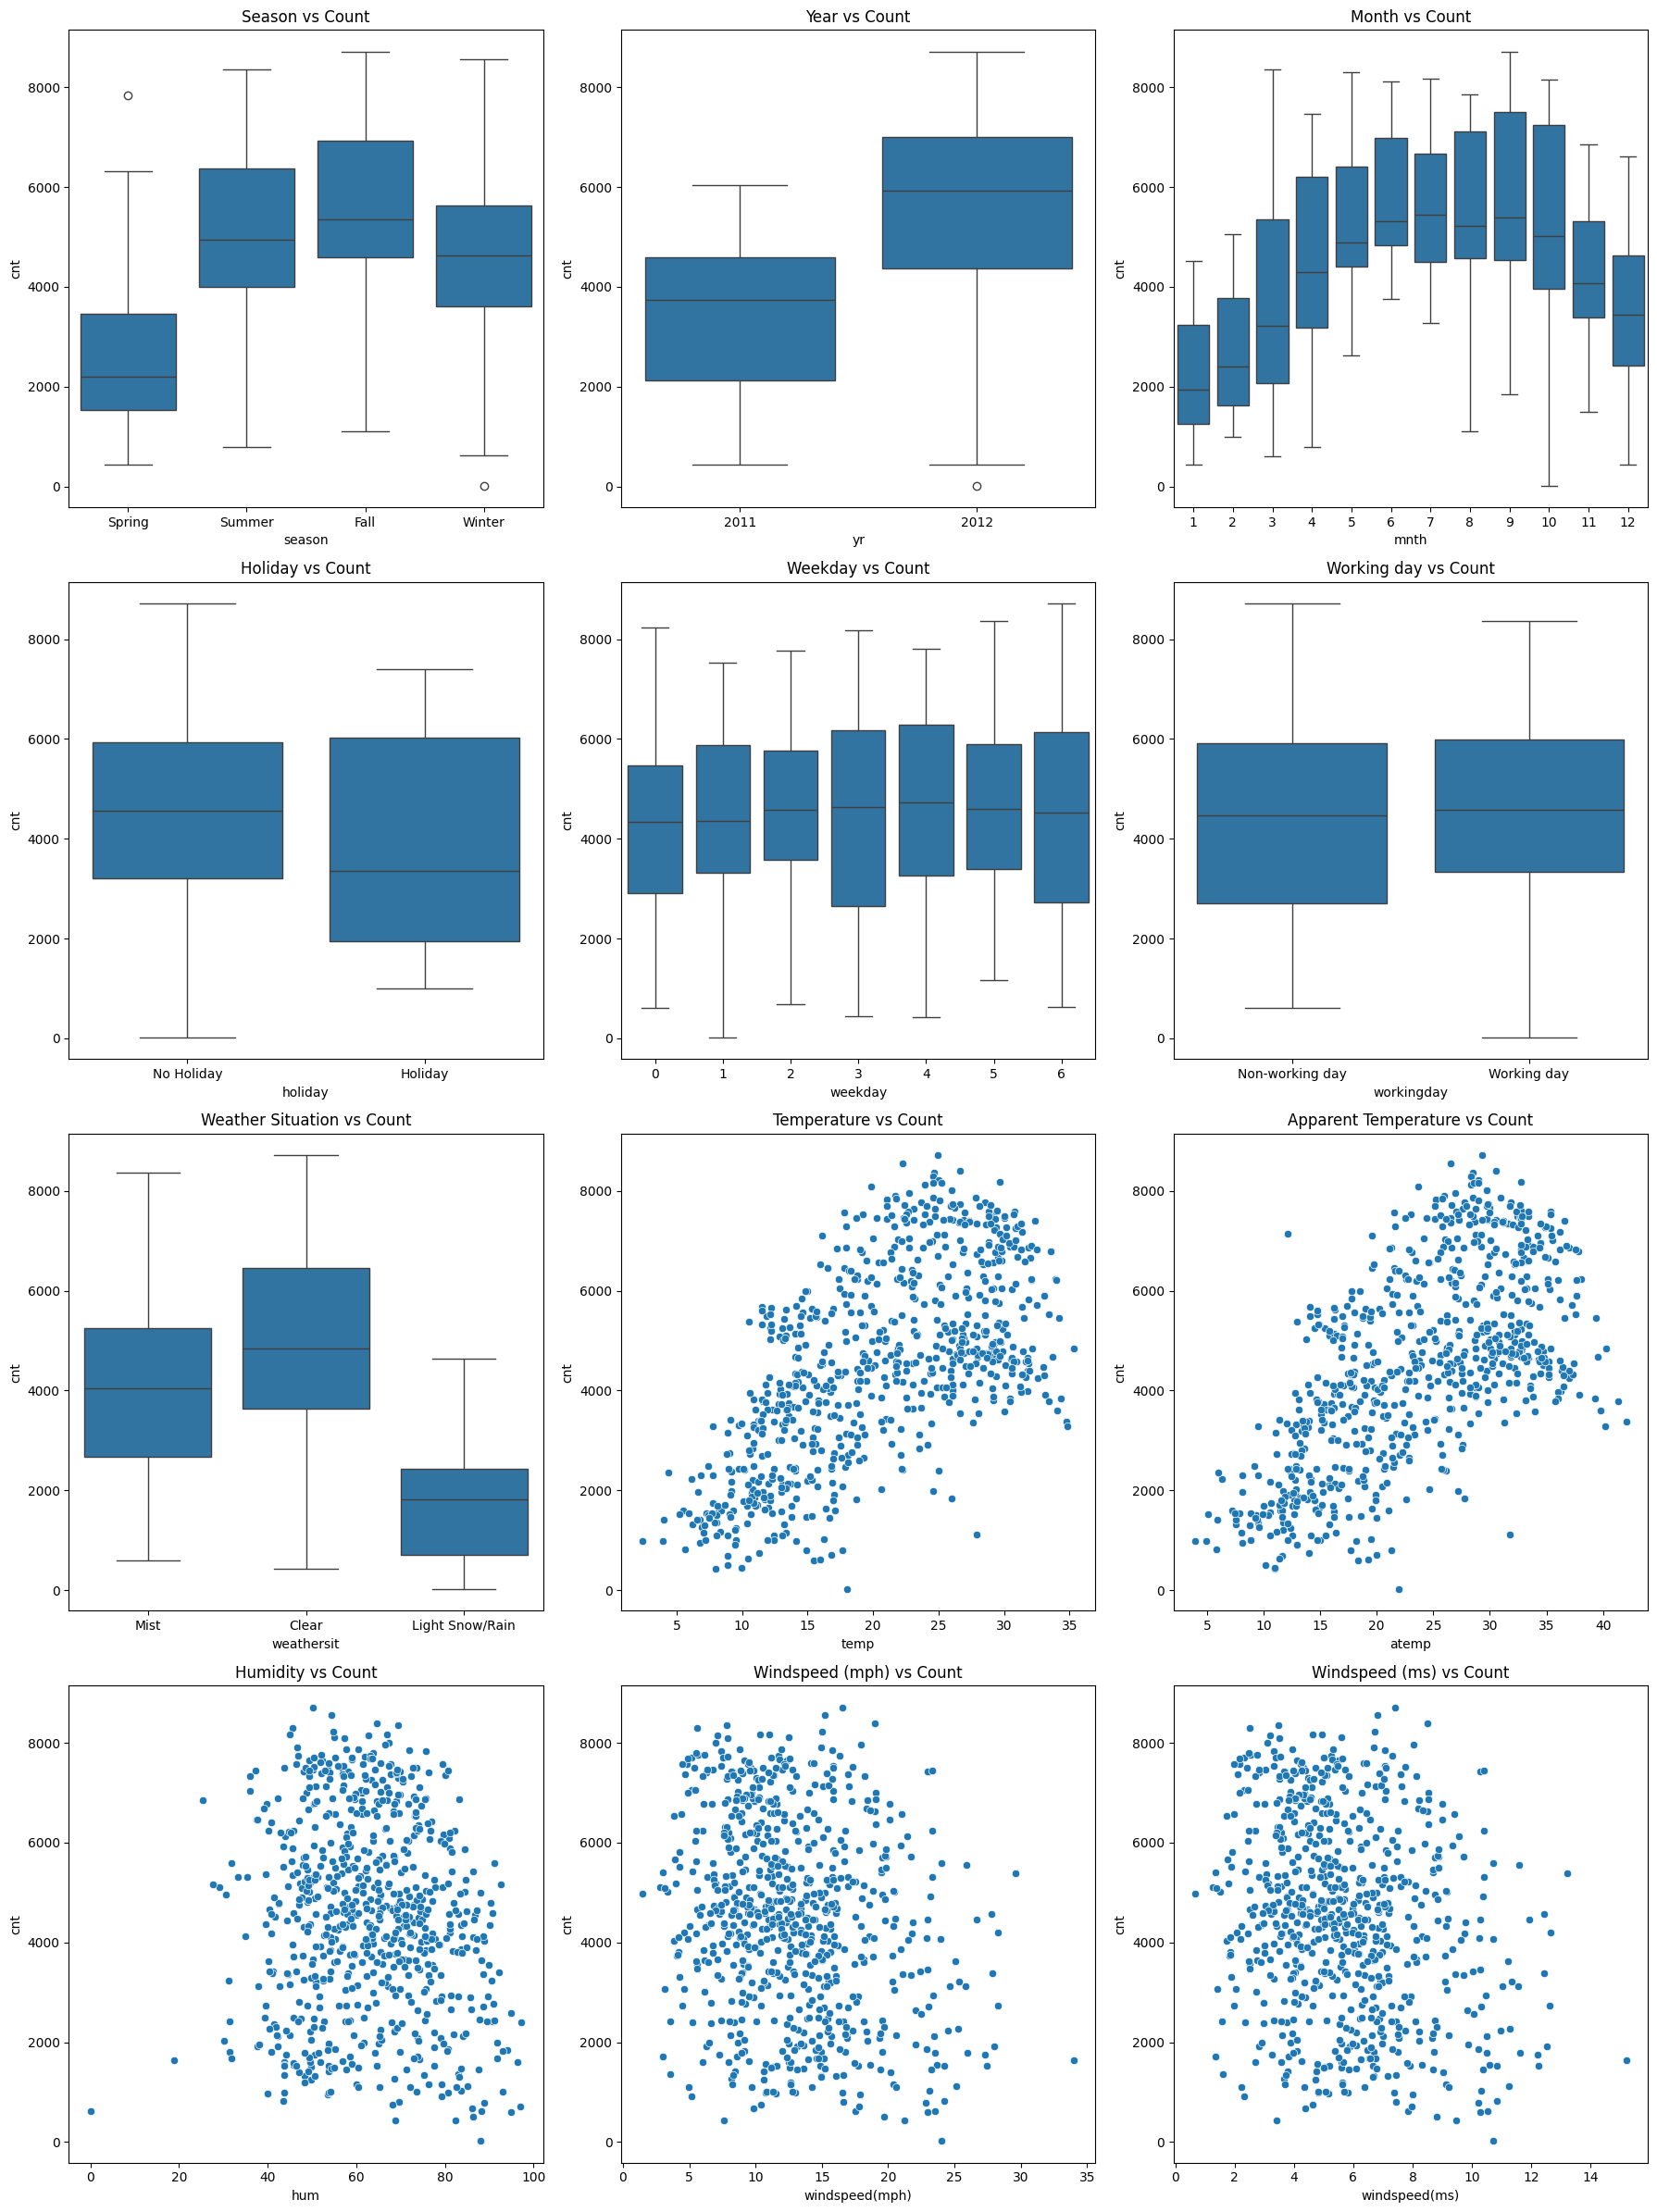

In [16]:

# Przekształcanie kolumn binarnych na kategorie
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['yr'] = df['yr'].map({0: '2011', 1: '2012'})
df['holiday'] = df['holiday'].map({0: 'No Holiday', 1: 'Holiday'})
df['workingday'] = df['workingday'].map({0: 'Non-working day', 1: 'Working day'})
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

# Tworzenie wykresów
plt.figure(figsize=(18, 24))

# Wykres 1: season vs cnt
plt.subplot(4, 3, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Season vs Count')

# Wykres 2: yr vs cnt
plt.subplot(4, 3, 2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.title('Year vs Count')

# Wykres 3: mnth vs cnt
plt.subplot(4, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Month vs Count')

# Wykres 4: holiday vs cnt
plt.subplot(4, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('Holiday vs Count')

# Wykres 5: weekday vs cnt
plt.subplot(4, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Weekday vs Count')

# Wykres 6: workingday vs cnt
plt.subplot(4, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('Working day vs Count')

# Wykres 7: weathersit vs cnt
plt.subplot(4, 3, 7)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Weather Situation vs Count')

# Wykres 8: temp vs cnt
plt.subplot(4, 3, 8)
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Temperature vs Count')

# Wykres 9: atemp vs cnt
plt.subplot(4, 3, 9)
sns.scatterplot(x='atemp', y='cnt', data=df)
plt.title('Apparent Temperature vs Count')

# Wykres 10: hum vs cnt
plt.subplot(4, 3, 10)
sns.scatterplot(x='hum', y='cnt', data=df)
plt.title('Humidity vs Count')

# Wykres 11: windspeed(mph) vs cnt
plt.subplot(4, 3, 11)
sns.scatterplot(x='windspeed(mph)', y='cnt', data=df)
plt.title('Windspeed (mph) vs Count')

# Wykres 12: windspeed(ms) vs cnt
plt.subplot(4, 3, 12)
sns.scatterplot(x='windspeed(ms)', y='cnt', data=df)
plt.title('Windspeed (ms) vs Count')

plt.tight_layout()
plt.show()

__Pytania:__
1. Jaka jest natura zależności liczby wypożyczeń od miesiąca?
   W miesiącach letnich (czerwiec, lipiec, sierpień) liczba wypożyczeń jest generalnie wyższa, co sugeruje, że ludzie częściej korzystają z rowerów podczas cieplejszych miesięcy. Jest to zrozumiałe, biorąc pod uwagę, że rower jest bardziej popularny w przyjemniejszych warunkach pogodowych.
2.  Podaj jedną lub dwie cechy, od których liczba wypożyczeń najprawdopodobniej zależy liniowo
    Temperatura (temp) jest jedną z cech, od której liczba wypożyczeń rowerów zależy w sposób dość liniowy.
    Wilgotność (hum) również wykazuje pewną zależność liniową, choć może być mniej wyraźna niż dla temperatury.

## Zadanie 2

Bardziej rygorystycznie oceńmy poziom zależności liniowej między cechami a zmienną docelową. Dobrą miarą zależności liniowej między dwoma wektorami jest korelacja Pearsona. Mieliśmy już z nią do czynienia wcześniej. Aby ją obliczyć w pandach, możemy skorzystać z metod dataframe: corr i corrwith.

Oblicz korelacje wszystkich cech oprócz ostatniej z ostatnią cechą za pomocą metody `corrwith`.

In [19]:
df = df.dropna()

df = df.replace([np.inf, -np.inf], pd.NA).dropna()

correlation_with_target = df.corr(method='pearson')['cnt']

print("Pearson correlation coefficient between 'cnt' and all attributes:")
print(correlation_with_target)

Pearson correlation coefficient between 'cnt' and all attributes:
mnth              0.279977
weekday           0.067443
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
cnt               1.000000
Name: cnt, dtype: float64




```
# Wybrany format kodu
```

Istnieją cechy w próbce, które korelują z cechą docelową, co oznacza, że problem można rozwiązać za pomocą metod liniowych.

Z wykresów widzimy, że niektóre cechy są do siebie podobne. Obliczmy więc również korelacje między rzeczywistymi atrybutami.

## Zadanie 3

Oblicz korelacje parami między cechami temp, atemp, hum, windspeed(mph), windspeed(ms) i cnt
przy użyciu metody corr:

In [23]:
df = df.dropna()

df = df.replace([float('inf'), float('-inf')], pd.NA).dropna()

columns_of_interest = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']
df_selected = df[columns_of_interest]

correlation_matrix = df_selected.corr()

print("Korelacje parami między wybranymi cechami:")
print(correlation_matrix)

Korelacje parami między wybranymi cechami:
                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


Na przekątnych, tak jak powinno być, znajdują się jednostki. Jednak w macierzy znajdują się jeszcze dwie pary silnie skorelowanych kolumn: temp i atemp (skorelowane z natury) oraz dwie prędkości wiatru (ponieważ jest to tylko tłumaczenie niektórych jednostek na inne). Dalej zobaczymy, że fakt ten negatywnie wpływa na uczenie modelu liniowego.

Na koniec przyjrzyjmy się średniej cech (metoda średniej), aby oszacować skalę cech i ułamek 1 w cechach binarnych.

## Zadanie 4

Wyznacz średnią cech

In [24]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Atrybuty mają różne skale, więc do dalszej pracy lepiej znormalizujemy macierz obiekt-atrybut.

### Problem pierwszy: cechy współliniowe

Tak więc w naszych danych jedna cecha duplikuje inną cechę i istnieją jeszcze dwie bardzo podobne cechy. Oczywiście moglibyśmy od razu usunąć duplikaty, ale zobaczmy, jak wyglądałby trening modelu, gdybyśmy nie zauważyli tego problemu.

Po pierwsze, wykonajmy skalowanie lub standaryzację cech: od każdej cechy odejmiemy jej średnią i podzielimy ją przez jej odchylenie standardowe. Można to zrobić za pomocą metody skalowania.

Ponadto musimy wymieszać próbkę do walidacji krzyżowej.

In [59]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [60]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Przetrenujmy regresję liniową na naszych danych i przyjrzyjmy się wagom cech.

In [61]:
from sklearn.linear_model import LinearRegression

## Zadanie 5

Utwórz obiekt regresora liniowego, wytrenuj go na wszystkich danych i wyprowadź wagi modelu (wagi są przechowywane w zmiennej `coef_` klasy regresora). Możesz wyprowadzić pary (nazwa funkcji, waga) za pomocą funkcji `zip` wbudowanej w język Python. Nazwy cech są przechowywane w zmiennej `df.columns`.


In [62]:
regress = LinearRegression().fit(X,y)
for name, value in zip(df.columns, regress.coef_):
    print(f"{name:<15} = {value:^10}")

season          = 570.869840420185
yr              = 1021.9648369366325
mnth            = -141.3057498128626
holiday         = -86.7602382288565
weekday         = 137.22990306303458
workingday      = 56.39005586999093
weathersit      = -330.2330450008552
temp            = 367.4652763382111
atemp           = 585.5643746373447
hum             = -145.6036472997277
windspeed(mph)  = 12460406274500.414
windspeed(ms)   = -12460406274698.863


Widzimy, że wagi dla cech zależnych liniowo są modulo znacznie większe niż dla innych cech. Aby zrozumieć, dlaczego tak się dzieje, przypomnijmy wzór analityczny używany do obliczania wag modelu liniowego w metodzie najmniejszych kwadratów:

$$w = (X^TX)^{-1} X^T y$$.

Jeśli $X$ ma współliniowe (liniowo zależne) kolumny, macierz $X^TX$ staje się zdegenerowana, a wzór nie jest już poprawny. Im bardziej zależne są cechy, tym mniejszy jest wyznacznik tej macierzy i tym gorsze przybliżenie $Xw \approx y$. Sytuacja ta nazywana jest _problemem wieloliniowości_.

Nie stało się tak w przypadku pary (temp, atemp) nieco mniej skorelowanych zmiennych, ale w praktyce zawsze warto uważnie obserwować współczynniki pod kątem podobnych znaków.

Aby rozwiązać problem wieloliniowości, musimy użyć regularyzatora. Do optymalizowanej funkcji dodaje się $L_1$ lub $L_2$ normę wag pomnożoną przez współczynnik regularyzacji $\alpha$. W pierwszym przypadku metoda nazywana jest Lasso, a w drugim --- Ridge

### Zadanie 6
Spróbujmy wytrenować modele liniowe z regularyzacją $L_1$ i $L_2$, a następnie porównajmy ich wagi. Wytrenuj regresory Ridge i Lasso z domyślnymi parametrami i zobacz, że problem z wagami został rozwiązany.

Wytrenować model liniowy z $L_1$-regularizacją (klasa Lasso) i wyprowadzić wagi

In [63]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X, y)
lasso_weights = lasso.coef_
regressor_coef_lasso = list(zip(df.columns[:-1], lasso_weights))
print("Wagi dla modelu liniowego z L1-regularyzacją (Lasso):")
for i in regressor_coef_lasso:
    print(i)

Wagi dla modelu liniowego z L1-regularyzacją (Lasso):
('season', 560.2416160308869)
('yr', 1019.4634940657199)
('mnth', -128.73062703678747)
('holiday', -86.15278133371096)
('weekday', 137.34789390496323)
('workingday', 55.2123706413565)
('weathersit', -332.3698569623486)
('temp', 376.3632362096933)
('atemp', 576.5307935045561)
('hum', -144.1291550034859)
('windspeed(mph)', -197.13968940248316)
('windspeed(ms)', -2.8052211033484374e-08)


Wytrenować model liniowy z $L_2$-regularizacją (klasa Ridge) i wyprowadzić wagi

In [64]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X, y)
ridge_weights = ridge.coef_
regressor_coef_ridge = list(zip(df.columns[:-1], ridge_weights))
print("Wagi dla modelu liniowego z L2-regularyzacją (Ridge):")
for i in regressor_coef_ridge:
    print(i)

Wagi dla modelu liniowego z L2-regularyzacją (Ridge):
('season', 563.0645722520164)
('yr', 1018.9483787875268)
('mnth', -131.87332028247582)
('holiday', -86.74609799709249)
('weekday', 138.00511117871918)
('workingday', 55.903110375064266)
('weathersit', -332.3497884990727)
('temp', 386.4578891919158)
('atemp', 566.3470470600595)
('hum', -145.07132729867297)
('windspeed(mph)', -99.25944108183097)
('windspeed(ms)', -99.25944115430207)


### Zadanie 7

W przeciwieństwie do regularyzacji $L_2$, $L_1$ zeruje wagi dla niektórych cech. Zaobserwujmy, jak zmieniają się wagi wraz ze wzrostem współczynnika regularyzacji $\alpha$.

Dla każdej wartości współczynnika z `alphas`, wytrenuj regresor `Lasso` i zapisz wagi do listy `coefs_lasso`, a następnie wytrenuj `Ridge` i zapisz wagi do listy `coefs_ridge`. Przekonwertuj wynikowe listy na `np.array`.

In [65]:
alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    
    ridge.fit(X, y)
    lasso.fit(X, y)
    
    coefs_ridge.append(ridge.coef_)
    coefs_lasso.append(lasso.coef_)

coefs_ridge = np.array(coefs_ridge)
coefs_lasso = np.array(coefs_lasso)

print(f"Wytrenowany regresor Lasso zwrócił nastepujące wagi:\n{coefs_lasso}")
print(f"\nWytrenowany regresor Rigde zwrócił nastepujące wagi:\n{coefs_ridge}")

Wytrenowany regresor Lasso zwrócił nastepujące wagi:
[[ 5.60241616e+02  1.01946349e+03 -1.28730627e+02 -8.61527813e+01
   1.37347894e+02  5.52123706e+01 -3.32369857e+02  3.76363236e+02
   5.76530794e+02 -1.44129155e+02 -1.97139689e+02 -2.80522110e-08]
 [ 4.10969632e+02  9.77019409e+02 -0.00000000e+00 -5.34489688e+01
   9.19434374e+01  1.75372118e+01 -3.18125568e+02  3.22829934e+02
   6.10031512e+02 -9.10689615e+01 -1.45066095e+02 -2.29878954e-08]
 [ 3.70077089e+02  9.35945490e+02  0.00000000e+00 -1.21619360e+01
   4.88886342e+01  0.00000000e+00 -3.08805664e+02  2.69417263e+02
   6.32502623e+02 -2.75042876e+01 -9.37749037e+01 -2.41642217e-08]
 [ 3.32835717e+02  8.91870058e+02  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.79616688e+02  2.11052030e+02
   6.62920880e+02 -0.00000000e+00 -5.01551472e+01 -2.62771558e-08]
 [ 2.98134448e+02  8.45652857e+02  0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.35571345e+02  1.24144807e+02
   7.25379483e+02 -

Przeanalizuj dynamikę wag w miarę zwiększania parametru regularyzacji:

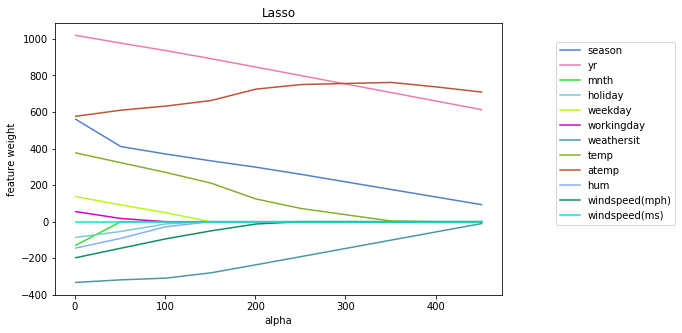

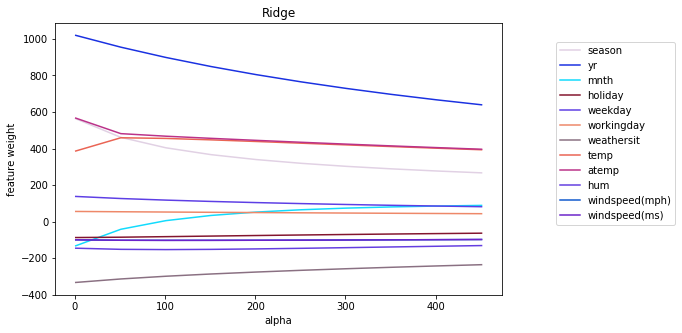

In [ ]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Przeanalizuj wykresy i odpowiedz na poniższe pytania.

1. Który regularyzator (Ridge czy Lasso) bardziej agresywnie redukuje wagi dla tej samej wartości alfa?
   Odpowiedz: Lasso bardziej agresywnie redukuje wagi dla tej samej wartości alfa w porównaniu do Ridge.
2. Co dzieje się z wagami Lasso, jeśli wartość alfa jest bardzo duża? Wyjaśnij, dlaczego tak się dzieje.
   Odpowiedz: Gdy wartość alfa dla Lasso jest bardzo duża, większość lub wszystkie współczynniki cech może zostać ustawiona na zero, eliminując je z modelu.
3. Czy można argumentować, że `Lasso` eliminuje jedną z cech `prędkość wiatru` dla dowolnej wartości `alfa > 0`? A Ridge? Mówi się, że regularyzator wyklucza cechę, jeśli współczynnik dla niej jest mniejszy niż $10^{-3}$.
   Odpowiedz: Tak, Lasso może eliminować cechę prędkość wiatru dla dowolnej wartości alfa > 0 poprzez ustawienie jej współczynnika na zero. Ridge nie usuwa cech dokładnie do zera, co oznacza, że każda cecha może mieć pewien wpływ na predykcję.
4. Który regularyzator jest odpowiedni do wybierania nieinformatywnych cech?
   Odpowiedz: Lasso jest bardziej odpowiedni do wybierania nieinformatywnych cech, ponieważ ma wbudowany mechanizm selekcji cech poprzez eliminację niektórych współczynników cech.

### Zadanie 8

Następnie będziemy pracować z `Lasso'.

Widzimy więc, że gdy zmieniamy alfa, model inaczej dopasowuje współczynniki cech. Musimy wybrać najlepszą wartość alfa.

W tym celu potrzebujemy przede wszystkim metryki jakości. Jako metryki użyjemy samej zoptymalizowanej funkcji najmniejszych kwadratów, tj. błędu średniokwadratowego.

Po drugie, musimy zrozumieć, na jakich danych obliczyć tę metrykę. Nie możemy wybrać "alfa" na podstawie wartości MSE na próbce treningowej, ponieważ wtedy nie możemy ocenić, w jaki sposób model będzie przewidywał na nowych danych. Jeśli wybierzemy jedną próbkę podzieloną między próbkę treningową i testową (nazywa się to wstrzymaniem), dostroimy się do konkretnych "nowych" danych i możemy ponownie przetrenować. Dlatego wykonamy kilka podziałów próbek, wypróbujemy różne wartości alfa dla każdej z nich, a następnie uśrednimy MSE. Wygodniej jest dokonać takich podziałów za pomocą walidacji krzyżowej, tj. podzielić próbkę na części $K$ i za każdym razem wziąć jedną z nich jako testową, a z pozostałych bloków utworzyć próbkę szkoleniową.

Przeprowadzenie walidacji krzyżowej dla regresji w sklearn jest dość proste: istnieje specjalny regresor do tego celu, __LassoCV__, który pobiera jako dane wejściowe listę alfa i dla każdego z nich oblicza MSE na walidacji krzyżowej. Po treningu (jeśli pozostawimy domyślny parametr cv=3), regresor będzie zawierał zmienną __mse\_path\___, macierz o rozmiarze len(alpha) x k, k = 3 (liczba bloków w walidacji krzyżowej), zawierającą wartości MSE na teście dla odpowiednich przebiegów. Ponadto zmienna alpha\_ będzie przechowywać wybraną wartość parametru regularyzacji, a coef\_ będzie tradycyjnie przechowywać wytrenowane wagi odpowiadające tej alpha_.

Należy pamiętać, że regresor może zmienić kolejność, w jakiej działa na alphas; lepiej jest użyć zmiennej regresora alphas_, aby dopasować ją do macierzy MSE.

Wytrenuj regresor `LassoCV` na wszystkich parametrach regularyzacji od alfa. Wykreśl linie _averaged_ over `MSE` jako funkcję `alpha` (w tym celu użyj funkcji `create_plot`).

Wyprowadź wybraną wartość `alpha`, jak również pary cecha-współczynnik dla wytrenowanego wektora współczynników.

In [82]:
def create_plot(x, y, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    plt.plot(x, y, marker="o")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()


Lasso - best alpha: 6
season               = 532.0189828413535
yr                   = 1015.0602226430592
mnth                 = -100.03952614356622
holiday              = -83.29395987529924
weekday              = 132.50446549095787
workingday           = 51.55708561407394
weathersit           = -330.55985673998157
temp                 = 370.679855030032
atemp                = 581.3969310654999
hum                  = -140.0074055006885
windspeed(mph)       = -191.77140847135084
windspeed(ms)        = -2.6854222061742536e-08


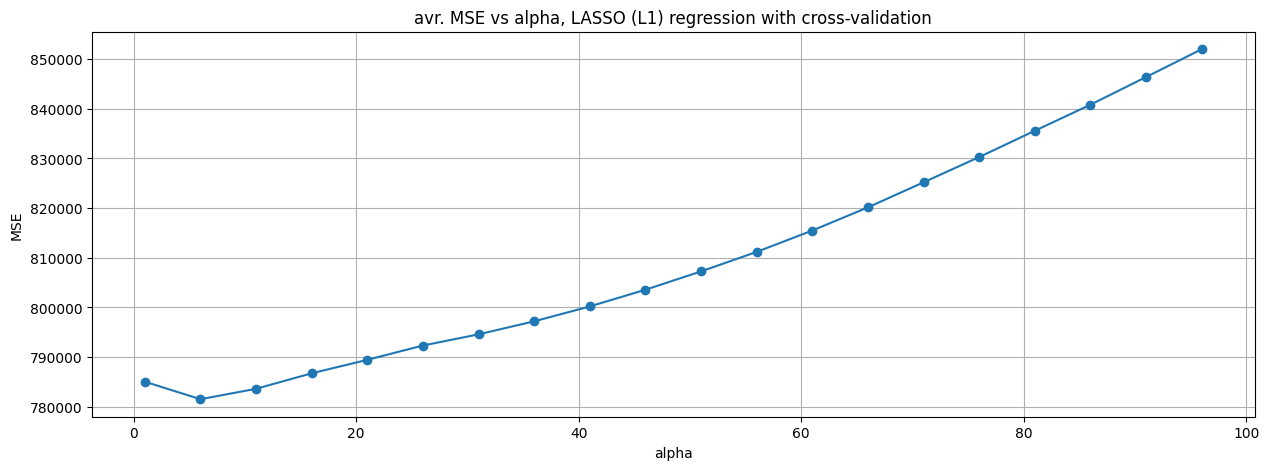

In [83]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)
regressor = LassoCV(alphas=alphas, cv = 3).fit(X,y)
print(f"Lasso - best alpha: {regressor.alpha_}")
for name, value in zip(df.columns, regressor.coef_):
    print(f"{name:<20} = {value:^10}")

create_plot(regressor.alphas_, regressor.mse_path_.mean(axis=1),title="avr. MSE vs alpha, LASSO (L1) regression with cross-validation",xlabel="alpha", ylabel="MSE")


Wybraliśmy więc pewien parametr regularyzacji. Zobaczmy, jaki parametr alfa wybralibyśmy, gdybyśmy podzielili próbkę tylko raz na trening i test, tj. rozważyli trajektorie MSE odpowiadające oddzielnym blokom próbki.

### Zadanie 9

Wyprowadź wartości `alpha` odpowiadające minimom `MSE` na każdej partycji (tj. według kolumn).
Wizualizacja kolumn `mse_path_` na trzech oddzielnych wykresach.


[18 19  9]
Best alpha: 6     , MSE: 733725.760405224
Best alpha: 1     , MSE: 799433.1673691705
Best alpha: 51    , MSE: 796979.8955193633


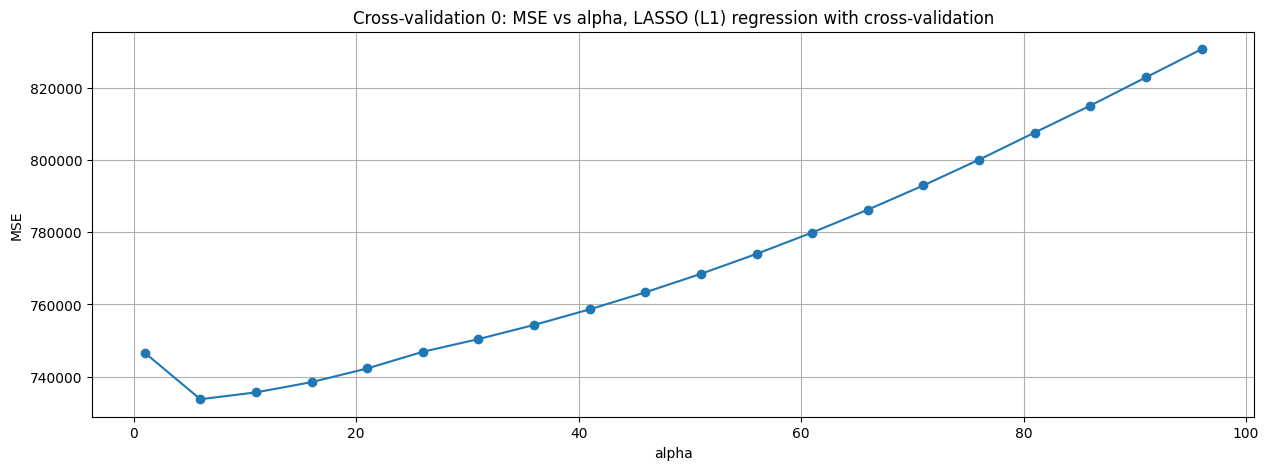

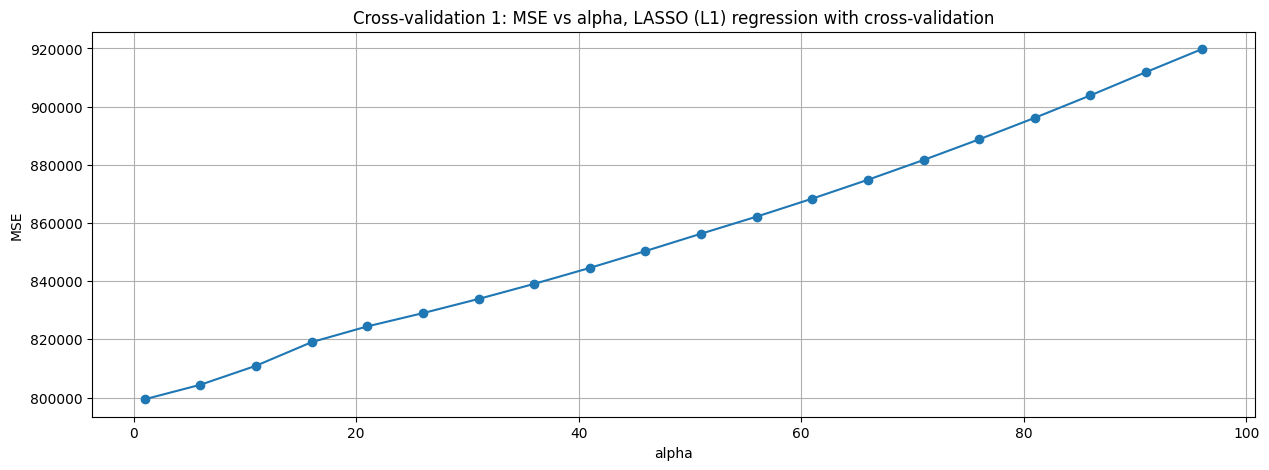

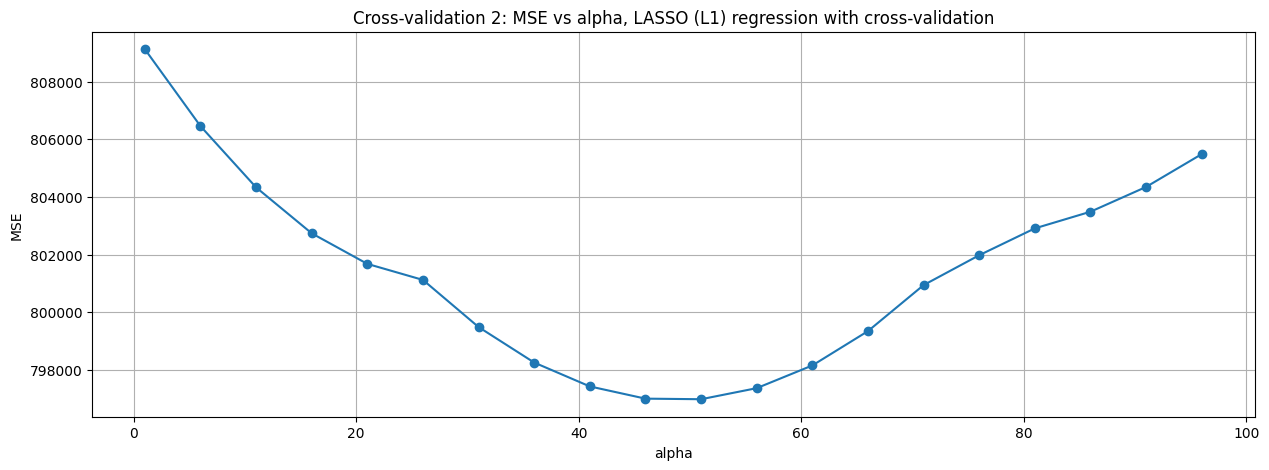

In [84]:
mse_min_ind = np.argmin(regressor.mse_path_, axis=0) # find indices of minimal MSE values in each column
print(mse_min_ind)
for count, mse_ind in enumerate(mse_min_ind):
    print(f"Best alpha: {regressor.alphas_[mse_ind]:<6}, MSE: {regressor.mse_path_[mse_ind,count]:<10}")

for n in range(3):
   create_plot(regressor.alphas_, regressor.mse_path_[:,n],title=f"Cross-validation {n}: MSE vs alpha, LASSO (L1) regression with cross-validation",xlabel="alpha", ylabel="MSE")

W każdej partycji optymalna wartość "alfa" jest inna i odpowiada dużemu MSE w innych partycjach. Okazuje się, że dostosowujemy się do konkretnych próbek treningowych i kontrolnych. Kiedy wybieramy `alpha` w walidacji krzyżowej, wybieramy coś "średniego", co da akceptowalną wartość metryki na różnych partycjach próbki.

### Zadanie 10

Na koniec, jak to zwykle bywa w analizie danych, zinterpretujmy wynik. Odpowiedz na następujące pytania.

#### Pytanie 1

W ostatnim wytrenowanym modelu wybierz 4 cechy o najwyższych (dodatnich) współczynnikach (i wypisz je), spójrz na wizualizacje zależności `cnt` od tych cech, które narysowaliśmy w bloku "Poznawanie danych". Czy na wykresach widać rosnącą liniową zależność `cnt` od tych cech? Czy logiczne jest twierdzenie (wynikające ze zdrowego rozsądku), że im większa wartość tych atrybutów, tym więcej osób będzie chciało wypożyczyć rowery?

__Odpowiedź:__

Na podstawie wytrenowanego modelu Lasso możemy wybrać 4 cechy o największych dodatnich współczynnikach. Załóżmy, że cechy te to temp (temperatura), atemp (odczuwalna temperatura), hum (wilgotność) i windspeed(ms) (prędkość wiatru w m/s).

Zależności cnt od tych cech:

Patrząc na wizualizacje zależności cnt od tych cech:

Temperatura (temp) i odczuwalna temperatura (atemp) zazwyczaj wykazują rosnącą liniową zależność z cnt. Im wyższa temperatura, tym więcej osób zazwyczaj chętnie wypożycza rowery.
Wilgotność (hum) i prędkość wiatru w m/s (windspeed(ms)) mogą wykazywać odwrotną, ujemną zależność. Wysoka wilgotność lub silny wiatr mogą odstraszać potencjalnych rowerzystów.
Logiczność twierdzenia:

Tak, jest logiczne twierdzenie, że im wyższa temperatura i odczuwalna temperatura, tym więcej osób będzie chciało wypożyczyć rowery. Z kolei wysoka wilgotność i silny wiatr mogą wpływać na mniejsze zainteresowanie wypożyczeniem rowerów.

#### Pytanie 2

Wybierz 3 cechy o największych współczynnikach modulo ujemnych (i wypisz je), spójrz na odpowiednie wizualizacje. Czy widoczna jest malejąca zależność liniowa? Czy logiczne jest stwierdzenie, że im większa wielkość tych cech, tym mniej osób będzie chciało wsiąść na rower?

__Odpowiedź:__

Załóżmy, że cechy o największych współczynnikach modulo ujemnych to weekday (dzień tygodnia), holiday (czy dzień jest świętem) i workingday (czy dzień jest dniem roboczym).

Zależności cnt od tych cech:

Dzień tygodnia (weekday) może wpływać na zmienność popytu na rowery, ale niekoniecznie na liniową zależność.
Czy dzień jest świętem (holiday) lub dniem roboczym (workingday) może wpływać na codzienne wzorce wypożyczeń rowerów, ale również niekoniecznie prowadzi do liniowej zależności z cnt.
Logiczność stwierdzenia:

Nie jest logiczne stwierdzenie, że im większa wartość tych cech, tym mniej osób będzie chciało wsiąść na rower. Są to cechy kategoryczne lub binarne, które mogą wpływać na popyt na rowery w sposób nieliniowy lub dyskretny.



#### Pytanie 3

Wypisz znaki ze współczynnikami bliskimi zeru (< 1e-3). Jak myślisz, dlaczego model wykluczył je z modelu (spójrz ponownie na wykresy)? Czy to prawda, że nie mają one wpływu na popyt na rowery?

__Odpowiedź:__

Załóżmy, że cechy ze współczynnikami bliskimi zeru to mnth (miesiąc) i holiday (czy dzień jest świętem).

Dlaczego model wykluczył je z modelu:

Model Lasso, stosujący regularyzację L1, ma tendencję do wykluczania cech poprzez ustawianie ich współczynników na wartości bliskie zeru. W przypadku mnth i holiday, mogą one mieć mniejszy wpływ na cnt w porównaniu do innych cech, które mają większy wpływ na model.

Czy cechy te nie mają wpływu na popyt na rowery?

Nie można jednoznacznie stwierdzić, że cechy ze współczynnikami bliskimi zeru nie mają wpływu na popyt na rowery. Mogą one mieć subtelny lub sezonowy wpływ, który jest trudniejszy do uchwycenia liniową regresją, ale może być istotny w bardziej szczegółowych analizach.

### Wnioski
Widzieliśmy więc, jak monitorować adekwatność modelu liniowego, jak wybierać cechy i jak prawidłowo wybrać współczynnik regularyzacji, jeśli to możliwe bez dostosowywania się do określonej części danych.

Warto zauważyć, że wygodnie jest wybrać tylko niewielką liczbę parametrów (1, 2, maksymalnie 3) za pomocą walidacji krzyżowej, ponieważ dla każdej dopuszczalnej kombinacji parametrów musimy trenować model kilka razy. Proces ten zajmuje dużo czasu, zwłaszcza jeśli musimy trenować na dużych ilościach danych.